┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


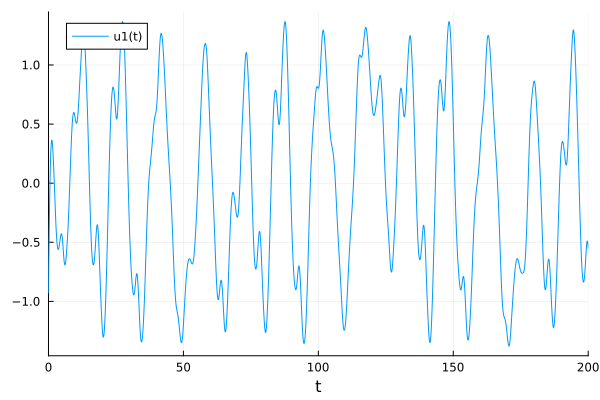

In [1]:
using Plots, DifferentialEquations, Random, LinearAlgebra

Random.seed!(1)

const g = 2.0
const N = 100
const T = 200.0
const J = g*randn(N,N)/sqrt(N)
h0 = randn(N)
tspan = (0.0,T)
r = Array{Float64}(undef,N)
function f(dh,h,p,t)
    dh .= h
    map!(tanh,r,h)
    BLAS.gemv!('N',1.,J,r,-1.0,dh)
end
prob = ODEProblem(f,h0,tspan)
sol = solve(prob,Vern8(),abstol=1/10^14,reltol=1/10^14,maxiters=10000000)
plot(sol,vars=(0,1))

In [2]:
# Precompile
sol1 = solve(prob,Euler(),dt=0.1)
sol2 = solve(prob,Euler(),dt=0.01)
sol3 = solve(prob,Euler(),dt=0.001)
sol4 = solve(prob,Tsit5())
sol5 = solve(prob,Vern9(),abstol=1e-13,reltol=1e-13)

# Times
t1 = @elapsed sol1 = solve(prob,Euler(),dt=0.1)
t2 = @elapsed sol2 = solve(prob,Euler(),dt=0.01)
t3 = @elapsed sol3 = solve(prob,Euler(),dt=0.001)
t4 = @elapsed sol4 = solve(prob,Tsit5())
t5 = @elapsed sol5 = solve(prob,Vern9(),abstol=1e-13,reltol=1e-13)

times = """
    Times:
    Euler dt=0.1    $t1
    Euler dt=0.01   $t2
    Euler dt=0.001  $t3
    Tsit5           $t4
    Vern9           $t5
"""
println(times)

    Times:
    Euler dt=0.1    0.011870909
    Euler dt=0.01   0.127537804
    Euler dt=0.001  1.435044226
    Tsit5           0.012720258
    Vern9           0.19059545



In [3]:
plt = plot(sol1, vars=(0,1), label="Euler dt=0.1")

plot!(plt, sol2, vars=(0,1), label="Euler dt=0.01")

plot!(plt, sol3, vars=(0,1), label="Euler dt=0.001", plotdensity = 10000)

plot!(plt, sol4, vars=(0,1), label="Tsit5 Default")

plot!(plt, sol5, vars=(0,1), label="Reference")

plt